In [1]:
import pandas as pd
import numpy as np
import random
import re
import csv
from collections import defaultdict
from gensim import corpora, models, similarities, matutils
from string import punctuation
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import nltk
from nltk import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from gensim.models.phrases import Phrases, Phraser

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\susan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#import matplotlib.pylab as pylab
#params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (15, 5),
#         'axes.labelsize': 'x-large',
#         'axes.titlesize':'x-large',
#         'xtick.labelsize':'x-large',
#         'ytick.labelsize':'x-large'}
#pylab.rcParams.update(params)

In [7]:
#pd.set_option('display.max_colwidth', -1)

In [8]:
##  Leer cluster de kmeans - VET
Vet_dreams_clusters_kmeans =np.array(pd.read_csv('../data/sa/vet_clusters_kmeans.txt', header=None, names=['Cluster'] )['Cluster'])
print(len(Vet_dreams_clusters_kmeans))
Vet_dreams_clusters_kmeans= np.array([x+1 for x in Vet_dreams_clusters_kmeans])

##  Leer cluster de kmeans - Phil
Phil_dreams_clusters_kmeans=[4, 3, 1, 4, 2, 1, 3, 0, 2, 1, 3, 2, 1, 3, 4, 4, 4, 2, 4, 3, 4, 2,
       4, 1, 2, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 2, 1, 2, 2, 1, 2, 1, 0, 4,
       3, 1, 4, 4, 1, 1, 4, 4, 1, 0, 4, 0, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 2, 2, 1, 4, 1, 1, 2, 0, 2, 4, 2, 4, 4, 1, 1, 1, 4, 3, 1, 4,
       1, 1, 1, 2, 2, 1, 0, 2, 1, 4, 1, 2, 2, 4, 1, 1, 1, 1, 4, 0, 0, 0,
       4, 2, 2, 0, 2, 4, 3, 0, 2, 1, 2, 3, 1, 2, 4, 2, 1, 0, 4, 3, 3, 1,
       2, 0, 4, 2, 1, 0, 1, 4, 2, 2, 1, 2, 2, 1, 4, 2, 3, 4, 4, 0, 0, 3,
       4, 2, 1, 0, 4, 4, 4, 0, 4, 1, 4, 4, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0,
       4, 2, 4, 0, 4, 3, 1, 4, 2, 4, 4, 2, 0, 3, 1, 4, 0, 4, 2, 4, 4, 2,
       4, 2, 1, 1, 4, 2, 4, 1, 4, 4, 3, 0, 2, 0, 2, 4, 2, 4, 2, 4, 0, 4,
       0, 3, 4, 4, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 3, 4, 2, 1, 0,
       0, 4, 0, 4, 0, 4, 4, 2, 1, 0, 4, 1, 2, 2, 2, 4, 2, 4, 1, 1, 0, 0,
       3, 2, 2, 3, 1, 4, 1, 4, 4, 4, 2, 2, 3, 4, 4, 4, 2, 4, 4, 1, 4, 0,
       2, 1, 2, 1, 2, 0, 4, 1, 1, 0, 2, 2, 0, 4, 4, 2, 1, 2, 4, 2, 2, 1,
       2, 4, 1, 1, 2, 0, 4, 2, 2, 4, 2, 0, 4, 2, 2, 1, 2, 3, 4, 3, 3, 3,
       2, 1, 2, 4, 4, 1, 2, 1, 1, 4, 0, 4, 4, 0, 4, 3, 0, 4, 0, 4, 1, 4,
       4, 1, 2, 4, 1, 2, 4, 4, 3, 4, 4, 4, 2, 1, 1, 0, 1, 0, 4, 2, 1, 4,
       1, 4, 0, 0, 3, 0, 1, 4, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0,
       4, 0, 0, 3, 4, 1, 4, 4, 2, 0, 1, 2, 4, 2, 1, 2, 4, 2, 3, 4, 4, 2,
       1, 1, 4, 0, 2, 4, 4, 0, 4, 2, 4, 0, 2, 1, 4, 0, 2, 2, 2, 1, 1, 4,
       0, 1, 2, 3, 0, 0, 0, 0, 0, 3, 0, 2, 4, 2, 0, 1, 0, 0, 0, 3, 4, 4,
       2, 2, 0, 0, 4, 0, 0, 4, 0, 2, 2, 0, 2, 2, 4, 2, 4, 4, 4, 4, 1, 4,
       2, 4, 2, 4, 1, 1, 4, 3, 4, 4, 0, 2, 2, 2, 0, 4, 0, 4, 4, 0, 4, 3]
Phil_dreams_clusters_kmeans= np.array([x+1 for x in Phil_dreams_clusters_kmeans])

593


In [9]:

with open('phil_clusters_kmeans.txt', 'w') as filehandle:
        for listitem in Phil_dreams_clusters_kmeans:
            filehandle.write('%d\n' % round(listitem,2))

In [10]:
summary = pd.read_csv('../data/dreamers_summary.csv', sep='|')
print(summary.shape)

(89, 8)


In [11]:
summary

,group,dreamer sex,dreamer age,dream years,numbers of dreams,summary,id,total_words
0,Alta: a detailed dreamer,female,adult,1985-1997,422,Alta is an adult woman who wrote down her drea...,1,166351.0
1,Angie: age 18 & 20,female,18 to 20,1996,48,Angie is a college student whose dreams are of...,2,9754.0
2,Arlie: a middle-aged woman,female,middle-aged,1992-1998,212,Arlie is an older adult woman who wrote down h...,3,22022.0
3,Barb Sanders,female,20 to 60,1960-1997,3116,Barb Sanders (not her real name) is a middle-a...,4,576351.0
4,Barb Sanders #2,female,60 to 64,1997-2001,1138,"1138 more dreams from Barb Sanders, written do...",5,217901.0
5,Barb Sanders: baseline,female,20 to 60,1960-1999,250,These 250 dreams are a representative sample o...,6,38588.0
6,Bay Area girls: Grades 4-6,female,9 to 11,1996-1997,234,The 388 dreams in this set were collected in N...,7,27521.0
7,Bay Area girls: Grades 7-9,female,12 to 14,1996-1997,154,The 388 dreams in this set were collected in N...,8,21712.0
8,Bea 1: a high school student,female,14 to 16,2003-2005,223,Bea's vivid dream reports from age 14 to 16 pr...,9,28698.0
9,Bea 2: a college student,female,14 to 16,2007-2010,63,See Bea 1.,10,14128.0


In [12]:
dream = pd.read_csv('../data/dreams_clean.csv', sep=';')
print(dream.shape)
# Borro aquellos sueños que no tienen palabras y aquellos en aleman que son los del grupo con id 18, 26 y 27
dream = dream.dropna(axis=0, subset=['words']).drop(dream.loc[dream['group_id'].isin([18, 26, 27, 79, 80])].index)
print(dream.shape)


(43226, 5)
(36202, 5)


In [13]:
df = pd.merge(dream, summary, left_on='group_id', right_on='id')
print(df.shape)


(36202, 13)


In [14]:
df.head()

,code,note,description,words,group_id,group,dreamer sex,dreamer age,dream years,numbers of dreams,summary,id,total_words
0,1,1957,"The one at the Meads's house, where it's bigge...",154.0,1,Alta: a detailed dreamer,female,adult,1985-1997,422,Alta is an adult woman who wrote down her drea...,1,166351.0
1,2,8/11/67,I'm at a family reunion in a large fine house ...,248.0,1,Alta: a detailed dreamer,female,adult,1985-1997,422,Alta is an adult woman who wrote down her drea...,1,166351.0
2,3,8/1/85,I watch a plane fly past and shortly realize i...,303.0,1,Alta: a detailed dreamer,female,adult,1985-1997,422,Alta is an adult woman who wrote down her drea...,1,166351.0
3,4,1985?,Me pulling the green leaves and berries off so...,468.0,1,Alta: a detailed dreamer,female,adult,1985-1997,422,Alta is an adult woman who wrote down her drea...,1,166351.0
4,5,1985?,I'm in a room that reminds me of (but definite...,561.0,1,Alta: a detailed dreamer,female,adult,1985-1997,422,Alta is an adult woman who wrote down her drea...,1,166351.0


In [15]:
df_vietnam = df.loc[df['group'].isin(['Vietnam Vet: 1970-2008 war dreams', 'Vietnam Vet: 2015 dreams', 'Vietnam Vet: 2016-17 dreams'])]
df_phil = df.loc[df['group'].isin(['Phil 1: teens', 'Phil 2: late 20s', 'Phil 3: retirement'])]

print(f"Se cuenta con {len(df_vietnam)} sueños de Vietnam. El corpus tiene {int(df_vietnam['words'].sum())} palabras.")
print(f"Se cuenta con {len(df_phil)} sueños de Phil, nuestro conjunto de control. El corpus tiene {int(df_phil['words'].sum())} palabras.")


Se cuenta con 593 sueños de Vietnam. El corpus tiene 80684 palabras.
Se cuenta con 506 sueños de Phil, nuestro conjunto de control. El corpus tiene 85162 palabras.


In [16]:
stoplist = stopwords.words('english')
def tokenize(one_document, stop_words=stopwords.words('english')):
    one_document = one_document.lower()
    return [
        word for word in word_tokenize(one_document) if word not in stoplist
        and word.isalpha() and len(word) > 1
        ]

texts = [tokenize(a_doc, stoplist) for a_doc in df['description']]

In [17]:
print("el corpus tiene",len(texts), "oraciones y",sum([len(x) for x in texts]),"palabras"   )

el corpus tiene 36202 oraciones y 2605429 palabras


In [18]:
collocations = Phrases(sentences=texts, min_count=10,threshold=0.5,scoring='npmi') # threshold: minimo score aceptado

In [19]:
to_collocations = Phraser(collocations)

In [20]:
df_collocations =pd.DataFrame([x for x in collocations.export_phrases(texts)],columns=["bigram","score"])
df_collocations.shape

(53422, 2)

In [21]:
df_collocations.drop_duplicates().sort_values(by="score",ascending=False).head(25)

,bigram,score
19558,b'alain delon',1.000000
17708,b'battlestar galactica',1.000000
18296,b'der beek',0.997489
46139,b'tae kwon',0.993486
7040,b'ping pong',0.993486
1040,b'clint eastwood',0.992357
2890,b'los angeles',0.991539
16757,b'freaks geeks',0.989074
14767,b'monty python',0.988196
13351,b'notre dame',0.985380


In [22]:
texts_ngrams = to_collocations[texts]

In [23]:
print("el corpus tiene",len(texts_ngrams), "oraciones y",sum([len(x) for x in texts_ngrams]),"palabras"   )

el corpus tiene 36202 oraciones y 2552007 palabras


## WordEmbedding Word2Vec

In [24]:
# "window" es el tamaño de la ventana. windows = 10, usa 10 palabras a la izquierda y 10 palabras a la derecha
# "n_dim" es la dimension (i.e. el largo) de los vectores de word2vec
# "workers" es el numero de cores que usa en paralelo. Para aprobechar eso es necesario tener instalado Cython)
# "sample": word2vec filtra palabras que aparecen una fraccion mayor que "sample"
# "min_count": Word2vec filtra palabras con menos apariciones que  "min_count"
# "sg": para correr el Skipgram model (sg = 1), para correr el CBOW (sg = 0)
# para mas detalle ver: https://radimrehurek.com/gensim/models/word2vec.html

w2v_model = Word2Vec(texts_ngrams, workers=4,size=20, min_count = 10, window = 10, sample = 1e-3,negative=10,sg=1)


In [25]:
#w2v_model.most_similar(positive=["danger"], negative=[], topn=25)

In [26]:
w2v_model.wv.n_similarity(["year"], ["year"])

1.0

In [27]:
w2v_model.wv.n_similarity(["car"], ["year"])

0.29926366

In [28]:
w2v_model.wv.n_similarity(["sun"], ["sunny"])

0.7867669

In [29]:
w2v_model.wv.n_similarity(["girl"], ["girls"])

0.84544486

In [30]:
w2v_model.wv.n_similarity(["boy"], ["girl"])

0.903741

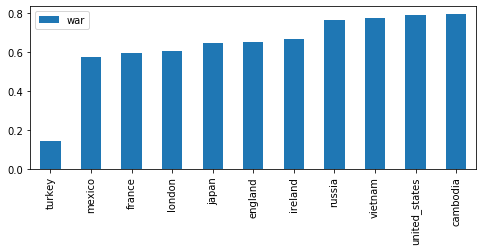

In [31]:
target_word="war"
places = ["vietnam","london","england","united_states","mexico","france","japan","russia","cambodia","ireland","turkey"]

fun_score = []
for place in places:
    fun_score.append(w2v_model.wv.n_similarity([target_word], [place]))
    
pd.DataFrame(fun_score,index = places,columns=[target_word]).sort_values(by=target_word).plot(kind="bar",figsize=(8,3), fontsize=10)

## Document Vector : Vectores de los sueños

In [32]:
# array con los WE de las palabras de un sueño
def hacer_array_de_WEs(one_dream):
    return [
      w2v_model.wv[word] for word in  texts_ngrams[one_dream]  if word in w2v_model.wv.vocab    
       ]


In [33]:
def hacer_vectores_dreams(lista_series):
    # lista_series: si quiero sobre todas las series , paso lista_series como una lista vacia 
    vectores_wes = [hacer_array_de_WEs(d) for d in list(range(len(df['description']))) if df['group'][d] in list(lista_series) or len(lista_series)==0]
    vectores_dreams = [ np.mean(np.array(vectores_wes[d]), axis = 0) for d in list(range(len(vectores_wes)))]
    return vectores_dreams

In [34]:
# Armo una matriz de distancias en base a similaridad coseno de gensim
def matriz_distancias(p_wes_dreams):
    distancias=np.zeros((len(p_wes_dreams),len(p_wes_dreams))) #matriz cuadrada
    for i,ti in enumerate(p_wes_dreams):
        for j,tj in enumerate(p_wes_dreams):
            distancias[i,j] = abs(1- w2v_model.wv.cosine_similarities(p_wes_dreams[i],p_wes_dreams[j:j+1])[0] )
    print (distancias.shape)
    return distancias

## sobre todos los sueños

In [35]:
#vectores_wes = [hacer_array_de_WEs(d) for d in list(range(len(df['description'])))]
#wes_dreams = [ np.mean(np.array(vectores_wes[d]), axis = 0) for d in list(range(len(vectores_wes)))]

lista_dreams=[]  #lista  vacia indica todas las series
wes_dreams = hacer_vectores_dreams(lista_dreams)


In [36]:
# Vectores de los 4 primeros sueños
#print(np.array(wes_dreams[:4]))

In [37]:
len(wes_dreams)

36202

In [38]:
# similaridad de un sueño con otros (los 200 que le siguen)
w1=wes_dreams[1]
vector_similaridades=w2v_model.wv.cosine_similarities(w1,wes_dreams[:200])
#print(vector_similaridades)
print ("sueños similarity min y max:",min(vector_similaridades), max(vector_similaridades))

sueños similarity min y max: 0.8412772 1.0


In [39]:
# distancias de 10 sueños entre sí
#pd.DataFrame(data=matriz_distancias(wes_dreams[:10]))

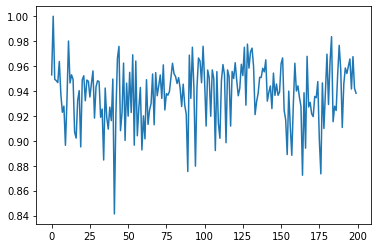

In [40]:
plt.plot(list(range(200)), vector_similaridades)

## sobre Vet serie 1

In [41]:

Vet_wes_dreams_s1 = hacer_vectores_dreams(['Vietnam Vet: 1970-2008 war dreams'])

In [42]:
print(len(Vet_wes_dreams_s1))

98


In [43]:
# similaridad de un sueño con los demás de la serie
w1=Vet_wes_dreams_s1[0]
vector_similaridades=w2v_model.wv.cosine_similarities(w1,Vet_wes_dreams_s1[:98])
print(vector_similaridades)
print ("sueños similarity:",min(vector_similaridades), max(vector_similaridades))

[1.0000001  0.9489716  0.9516208  0.96558845 0.9291225  0.928133
 0.9628569  0.9782407  0.97879696 0.94672275 0.98194695 0.9374025
 0.96950626 0.9565819  0.9344118  0.91788507 0.9450957  0.9384322
 0.90891397 0.95734745 0.96360546 0.9660802  0.96379846 0.9718799
 0.9541018  0.96148205 0.94739455 0.9281225  0.93300587 0.97229433
 0.9750375  0.97040784 0.9240217  0.96866465 0.9581389  0.93520397
 0.9380137  0.9149749  0.8827989  0.9463038  0.86551076 0.90357524
 0.9515507  0.9619093  0.9320089  0.95745337 0.91567254 0.94480133
 0.94084686 0.9589652  0.9496075  0.942942   0.8984297  0.9069412
 0.92450523 0.9538857  0.95611537 0.9583413  0.92324156 0.94074816
 0.963788   0.93223447 0.9512023  0.9587942  0.94666433 0.901291
 0.9553269  0.9371804  0.94070435 0.8780109  0.85223675 0.95291317
 0.8870591  0.804869   0.9631428  0.90998274 0.95517266 0.8943987
 0.921165   0.9542989  0.9530977  0.89457345 0.9268769  0.93796283
 0.908635   0.9589487  0.94788116 0.8662816  0.93802196 0.9510955
 0.92

In [44]:
df_s = pd.DataFrame(data=vector_similaridades,columns=['similaridad'])
df_s.sort_values('similaridad')

,similaridad
73,0.804869
70,0.852237
40,0.865511
87,0.866282
69,0.878011
38,0.882799
72,0.887059
77,0.894399
81,0.894573
52,0.898430


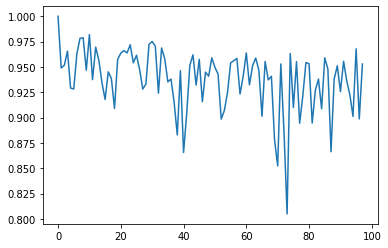

In [45]:
plt.plot(list(range(98)), vector_similaridades)

In [46]:
# ahora veo que pasa con el sueño 73 que dió mas diferente del primer sueño
w1=Vet_wes_dreams_s1[73]
vector_similaridades=w2v_model.wv.cosine_similarities(w1,Vet_wes_dreams_s1[:98])
print(vector_similaridades)
print ("sueños similarity:",min(vector_similaridades), max(vector_similaridades))

[0.80486894 0.82318574 0.9059943  0.8772305  0.7972681  0.9166915
 0.82799953 0.87525403 0.825763   0.8971283  0.8378651  0.88707894
 0.8400247  0.8829784  0.82462764 0.92777616 0.88420767 0.7806425
 0.82215667 0.87089664 0.8561779  0.7718845  0.86348736 0.8697236
 0.8221744  0.8746473  0.8731375  0.7794     0.92506623 0.8413622
 0.86030906 0.8406786  0.8993555  0.8338182  0.85574806 0.88679475
 0.8663554  0.81225556 0.8880452  0.85613054 0.86380994 0.81528825
 0.89921945 0.872879   0.77105826 0.8406109  0.6974401  0.81529534
 0.877231   0.84281415 0.78258353 0.81415486 0.8510537  0.7909362
 0.90479463 0.843413   0.8618862  0.85811037 0.9288116  0.88094044
 0.87928194 0.84654444 0.8260951  0.8288733  0.7719132  0.93416566
 0.8336757  0.9295999  0.85772365 0.7738627  0.884661   0.88009584
 0.84800833 1.         0.8786153  0.8967612  0.8401279  0.8028578
 0.85539097 0.82482153 0.89249647 0.83368325 0.91231817 0.8836501
 0.80374163 0.84986955 0.83598244 0.88123375 0.88544154 0.83039767
 0

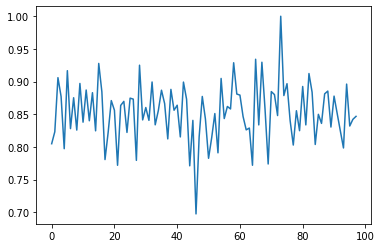

In [47]:
plt.plot(list(range(98)), vector_similaridades)

## Clustering sobre los vectores de los sueños 

## Clustering jerarquico

In [48]:
# Definicion Funcion de hopkins para evaluar tendencia al clustering
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute',metric='cosine').fit(df) # buscador de vecinos
    
    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

In [49]:
def expland_color_coef_sil(p_dreams_clusters,p_coef_sil):
    coef_sil_dreams=pd.DataFrame(list(range(1,len(p_dreams_clusters)+1)) , columns=["dream"])
    coef_sil_dreams["cluster"]=pd.DataFrame(p_dreams_clusters,columns=["cluster"])
    resultado=coef_sil_dreams.merge(p_coef_sil, right_index=True, left_on='cluster').sort_values(by="dream")
    return resultado

In [50]:
# Estimar el coeficiente de Silhouette para cada cluster
def hacer_silhouette(p_datos, p_clusters):
    #sample_silhouette_values = silhouette_samples(matriz_distancias(p_datos), p_clusters, metric="precomputed")
    sample_silhouette_values = silhouette_samples(p_datos, p_clusters, metric="cosine")
    ########
    #with open('vet_clusters_silh.txt', 'w') as filehandle:
    #    for listitem in sample_silhouette_values:
    #        filehandle.write('%f\n' % round(listitem,2))
    #########
    cluster_labels = p_clusters
    n_clusters=len(np.unique(cluster_labels))
    ith_cluster_silhouette_avg = []
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i+1]
        ith_cluster_silhouette_avg.append(np.mean(ith_cluster_silhouette_values)) 
    print(pd.DataFrame(ith_cluster_silhouette_avg,columns=['avg']).sort_values(by="avg",ascending=False).head(15))
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(p_datos) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i+1]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Coeficiente de silhouette")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    silhouette_avg = silhouette_score(matriz_distancias(p_datos), p_clusters, metric="precomputed")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()
    p_coef_sil=pd.DataFrame(ith_cluster_silhouette_avg,columns=['avg'], index=list(range(1,n_clusters+1)))
    p_coef_sil["color"]="blue"
    p_coef_sil["color"][p_coef_sil["avg"]<0]="red"
    
    resultado=expland_color_coef_sil(p_clusters,p_coef_sil)
    return resultado

In [51]:
def ClusterJerarq(p_datos, p, p_lista_dreams):
    n = len(p_datos)
    print('cantidad de sueños =',n)
    #print('Tendencia al clustering Hopkins: ',Hopkins(pd.DataFrame.from_records(p_datos).values))
    #print('Tendencia al clustering Hopkins: ',Hopkins(matriz_distancias(p_datos)))
    
    m_dist=matriz_distancias(p_datos)
        
    l = linkage(m_dist, method='average', metric='cosine',optimal_ordering=True)
    #l = linkage(p_datos, method='complete', metric='euclidean',optimal_ordering=True)
    #l = linkage( squareform(m_dist, force='tovector', checks=False), optimal_ordering=False)
   

    # calculate full dendrogram
    plt.figure(figsize=(25, 10))
    #plt.figure()
    plt.title('Hierarchical Clustering Dendrogram')
    plt.ylabel('distance')
    plt.xlabel('dreams')

    den=dendrogram(
        l,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        orientation='top',
        truncate_mode='lastp',  # show only the last p merged clusters
        p=50,  # show only the last p merged clusters
        show_leaf_counts=True,  # otherwise numbers in brackets are counts
        show_contracted=True,  # to get a distribution impression in truncated branches
    )

    ax = plt.gca()
    bounds = ax.get_xbound()
    ax.plot(bounds, [p, p], '--', c='k')
    plt.show()
    
    #c, coph_dists = cophenet(l, pdist(p_datos))
    #c, coph_dists = cophenet(l, squareform(m_dist, force='tovector', checks=False))
    
    #print('Coeficiente Cofenetico :  ',c)
         
    #clusters de sueños, depende a donde corto el dendograma, con p
    f=fcluster(l, p, 'distance')
    
    return f

In [52]:
def get_year(fecha):
    if fecha.find("-")==4:
        year=fecha[:4]
    else:
        year=fecha[-4:]
    return year

In [53]:
def grafico_clusters_dreams(p_clusters, p_lista_dreams, p_colors):
    n = len(p_clusters)
    plt.figure(figsize=(18,6))
  
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")

    if len(p_colors)==0 :
        plt.scatter(list(range(n)), p_clusters,c="blue", s=20, alpha=0.4)
    else:
        plt.scatter(list(range(n)), p_clusters,c=p_colors,s=20, alpha=0.4)
               
    
    plt.xlabel('Dream #')
    plt.ylabel('Cluster #');
    
    sns.despine(left=True, bottom=True)
    
    #grafico los sueños en los clusters, marco donde empieza cada serie
    ax = plt.gca()
    if p_lista_dreams[0][:1]=="V":
        ax.set_title("Series Vietnam Vet", fontsize='x-large')
    else:
        ax.set_title("Series Phil", fontsize='x-large')
    bounds = ax.get_ybound()
    pos_x=0
    year_f=None
    
    for grupo in p_lista_dreams:
        ax.plot([pos_x, pos_x],bounds, color='lightgreen',linewidth=5,linestyle='solid')
                
        fecha_i=df[df['group']==grupo]["note"].values[0] 
        year_i=get_year(fecha_i)
        ax.annotate(year_i, xy=(pos_x+1, bounds[1]),fontsize='large')
        if year_f!= None:
            ax.annotate(year_f, xy=(pos_x-20, bounds[1]),fontsize='large') 
        cant_dreams=summary[summary['group']==grupo]["numbers of dreams"].values[0]
        pos_x=pos_x+cant_dreams
        ultimo=len(df[df['group']==grupo])-1
        fecha_f=df[df['group']==grupo]["note"].values[ultimo]
        year_f=get_year(fecha_f)
        if cant_dreams < 50:
            year_f=None
        #print(pos_x)
          
    ax.plot([pos_x, pos_x],bounds, color='lightgreen',linewidth=5,linestyle='solid')
    ax.annotate(year_f, xy=(pos_x-20, bounds[1]),fontsize='large')
    ax.yaxis.set_ticks(np.arange(1,max(p_clusters)+1, 1))
   
    plt.savefig("clusters_dreams"+p_lista_dreams[0][:1]+".pdf")
    #plt.show()
    
 
    

In [54]:
def grafico_histograma_clusters(p_clusters, p_lista_dreams):
         
    #histogramas
    if len(p_lista_dreams)>0:
        fig, axes = plt.subplots(1, 3, figsize=(15,5))
        pos_i=0
        pos_f=0
        i=0
        for axis in axes :
                grupo=p_lista_dreams[i]
                print(grupo)
                n=summary[summary['group']==grupo]["numbers of dreams"].values[0]
                pos_f=pos_i + n - 1
                #print(pos_i, pos_f, n)
                data = {grupo:p_clusters[pos_i:pos_f]}
                pd.DataFrame(data).hist(ax=axis)
                pos_i=pos_i + n
                i= i + 1


    

In [55]:
# Para las listas de colores segun las emociones
col         = 'Sentimiento'
choices     = [ "green", 'black', 'pink','blue','red','yellow', 'brown','lightblue']


In [56]:
# Leo SA para Vet 
# Positivos y Negativos
Vet_dominant_sent = pd.read_csv('../data/sa/vet_dominant_sent.txt', header=None ,names=['Sentimiento'])
print(Vet_dominant_sent.iloc[:,-1].value_counts())
Vet_dominant_sent['color']= np.where( Vet_dominant_sent["Sentimiento"]=="Negative" , "black", "blue")
Vet_dominant_sent_colors=list(Vet_dominant_sent['color'])
# Emociones
Vet_dominant_emot = pd.read_csv('../data/sa/vet_dominant_emot.txt', header=None ,names=['Sentimiento'])
print(Vet_dominant_emot.iloc[:,-1].value_counts())
Vet_conditions  = [ Vet_dominant_emot[col] =="Trust",Vet_dominant_emot[col] =="Fear",Vet_dominant_emot[col] =="Joy",
               Vet_dominant_emot[col] =="Sadness", Vet_dominant_emot[col] =="Anger",Vet_dominant_emot[col] =="Anticipation",
              Vet_dominant_emot[col] =="Disgust",Vet_dominant_emot[col] =="Surprise"]
Vet_dominant_emot['color']= np.select( Vet_conditions, choices)
Vet_dominant_emot_colors=list(Vet_dominant_emot['color'])
# Topicos
Vet_topics =list(pd.read_csv('../data/sa/vet_topics.txt', header=None, names=['Topico'] )['Topico'])
#Vet_topics




Negative    403
Positive    190
Name: Sentimiento, dtype: int64
Fear            171
Trust           159
Sadness          87
Joy              87
Anger            47
Anticipation     28
Disgust          14
Name: Sentimiento, dtype: int64


In [57]:
# Leo SA para  PHil

# Positivos y Negativos
Phil_dominant_sent = pd.read_csv('../data/sa/phil_dominant_sent.txt', header=None ,names=['Sentimiento'])
#print(Phil_dominant_sent.iloc[:,-1].value_counts())
Phil_dominant_sent['color']= np.where(Phil_dominant_sent["Sentimiento"]=="Negative" , "black", "blue")
Phil_dominant_sent_colors=list(Phil_dominant_sent['color'])

# Emociones
Phil_dominant_emot = pd.read_csv('../data/sa/phil_dominant_emot.txt', header=None ,names=['Sentimiento'])
#print(Phil_dominant_emot.iloc[:,-1].value_counts())
Phil_conditions  = [ Phil_dominant_emot[col] =="Trust",Phil_dominant_emot[col] =="Fear",Phil_dominant_emot[col] =="Joy",
               Phil_dominant_emot[col] =="Sadness", Phil_dominant_emot[col] =="Anger",Phil_dominant_emot[col] =="Anticipation",
              Phil_dominant_emot[col] =="Disgust",Phil_dominant_emot[col] =="Surprise"]
Phil_dominant_emot['color']= np.select( Phil_conditions, choices)
Phil_dominant_emot_colors=list(Phil_dominant_emot['color'])

# topicos
Phil_topics = list(pd.read_csv('../data/sa/phil_topics.txt', header=None, names=['Topico'] )['Topico'])
#Phil_topics


In [58]:
def grafico_heatmap(df_base, p_dream_clusters, p_col1, p_col2):
    df_base.reset_index(drop=True, inplace=True)
    df_clusters_dreams=pd.DataFrame(p_dream_clusters,columns=[p_col2])
    df_base.head()
    resultado=df_base.merge(df_clusters_dreams, right_index=True, left_index=True)
    datos_summary=pd.DataFrame({'count':resultado.groupby([p_col1,p_col2]).size()}).reset_index()
    
    sns.set()
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_yticklabels(ax.get_xticklabels(),rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0, fontsize=20)
    ax = sns.heatmap(datos_summary.pivot( p_col1,p_col2, "count"), annot=True,cmap="Greens",fmt=".0f",linewidths=0.1)
    plt.title("Heatmap Vet_clusters_series", fontsize=15)
   
    #plt.show()


## Sobre Vet completo

cantidad de sueños = 593
(593, 593)


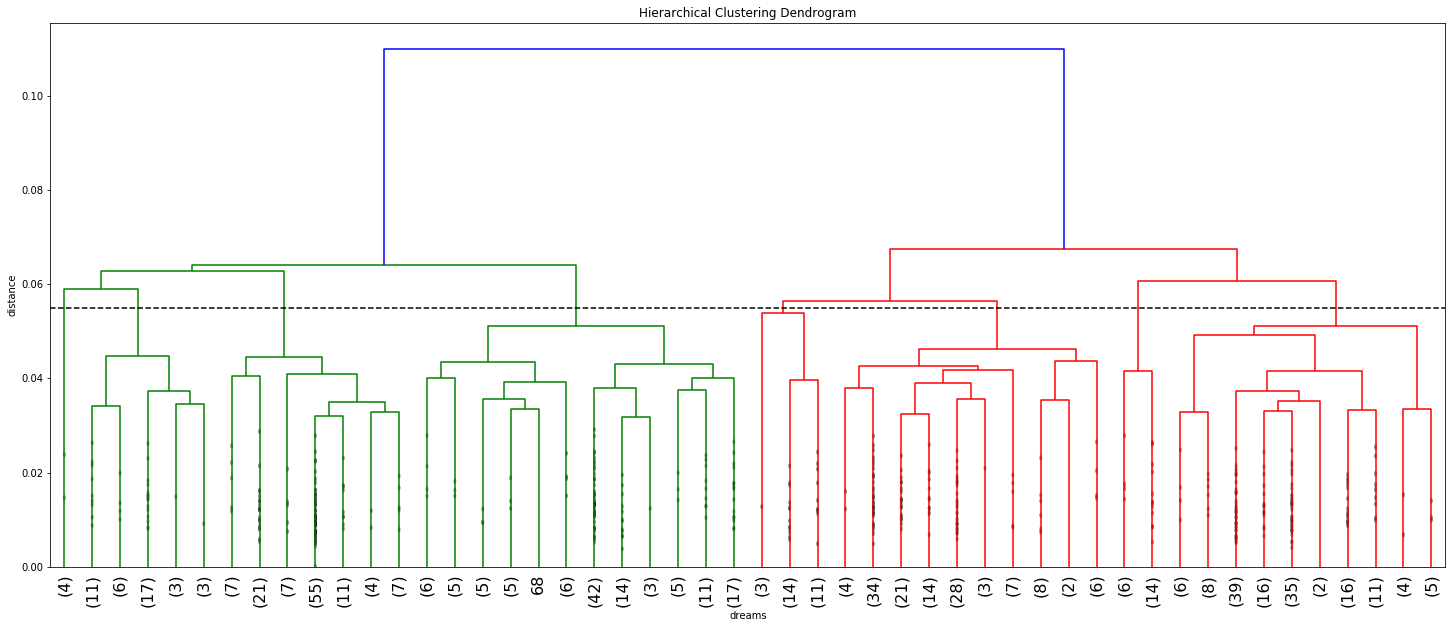

In [59]:
Vet_lista_dreams=['Vietnam Vet: 1970-2008 war dreams', 'Vietnam Vet: 2015 dreams', 'Vietnam Vet: 2016-17 dreams']
Vet_wes_dreams = hacer_vectores_dreams(Vet_lista_dreams)
Vet_dreams_clusters_jerarq=ClusterJerarq(Vet_wes_dreams,0.055,Vet_lista_dreams) #0.055

        avg
3  0.196157
2  0.179602
7  0.173820
0  0.145561
4  0.145177
5  0.138348
1  0.085525
6  0.054362
(593, 593)


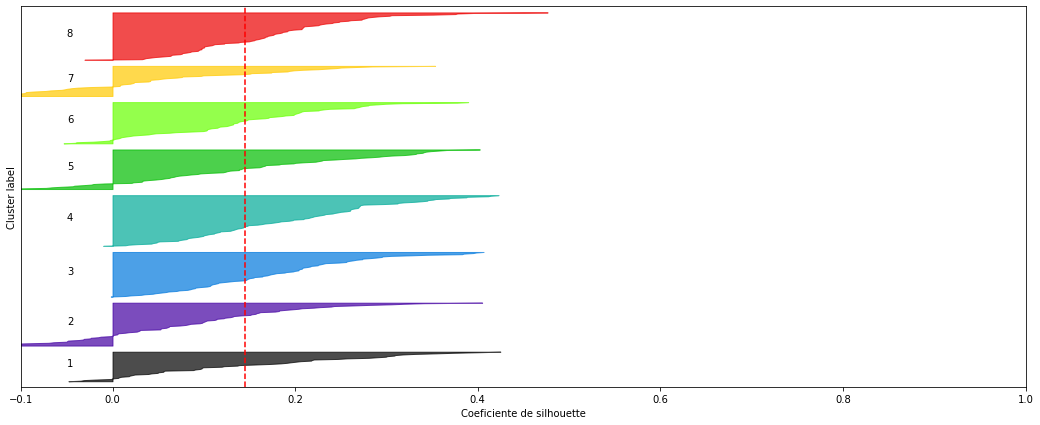

array([0.08552469, 0.14517729, 0.05436191, 0.19615665, 0.13834798,
       0.17960243, 0.17382   , 0.14556052])

In [60]:
## Sobre clusters de kmeans
Vet_coef_sil=hacer_silhouette(Vet_wes_dreams, Vet_dreams_clusters_kmeans)
#print('len',len(Vet_coef_sil))
Vet_coef_sil["avg"].unique()

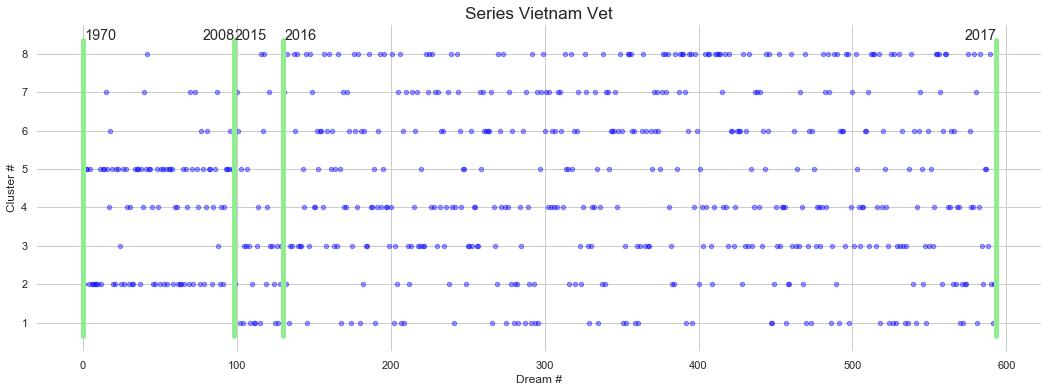

In [61]:
#Opciones de colorear:
# [] todos el mismo color
# Vet_dominant_emot_colors
# Vet_dominant_sent_colors
# Vet_topics
# list(Vet_coef_sil['color']) segun silhuette positivo y negativo

grafico_clusters_dreams(Vet_dreams_clusters_kmeans,Vet_lista_dreams,[])

#grafico_clusters_dreams(Vet_dreams_clusters_jerarq,Vet_lista_dreams, list(Vet_coef_sil['color']))
#grafico_clusters_dreams(Vet_dreams_clusters_jerarq,Vet_lista_dreams,Vet_dominant_emot_colors)
#grafico_clusters_dreams(Vet_dreams_clusters_kmeans,Vet_lista_dreams,Vet_dominant_emot_colors)

#grafico_clusters_dreams(Vet_dreams_clusters_jerarq,Vet_lista_dreams,Vet_topics)
#grafico_histograma_clusters(Vet_dreams_clusters_jerarq,Vet_lista_dreams)

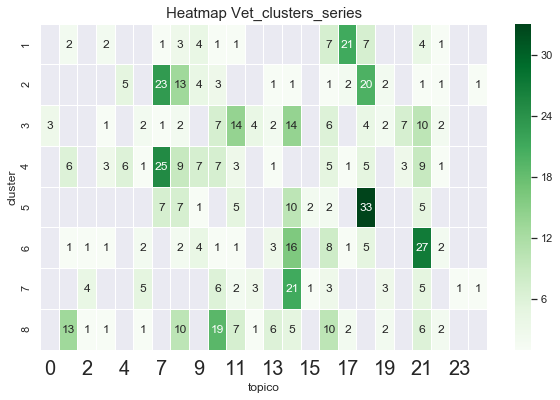

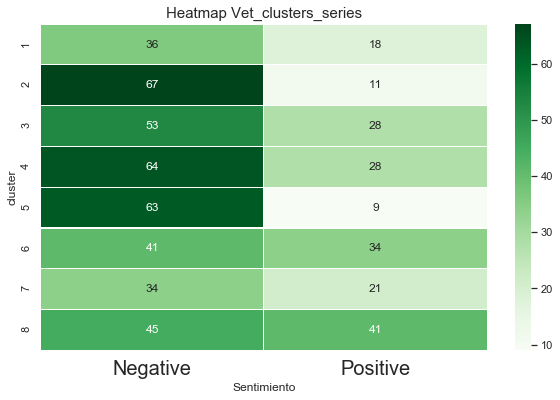

In [62]:


#grafico_heatmap(df_vietnam, Vet_dreams_clusters_kmeans,"group","cluster")
grafico_heatmap(pd.DataFrame(Vet_dreams_clusters_kmeans, columns=["cluster"]), Vet_topics,"cluster","topico")
plt.savefig("heatmap_Vet_topico.pdf")
grafico_heatmap(pd.DataFrame(Vet_dreams_clusters_kmeans, columns=["cluster"]), np.array(Vet_dominant_sent["Sentimiento"]),"cluster","Sentimiento")
plt.savefig("heatmap_Vet_sentim.pdf")

In [322]:
#with open('vet_clusters_jerarq_6.txt', 'w') as filehandle:
#    for listitem in Vet_dreams_clusters_jerarq:
#        filehandle.write('%d\n' % listitem)

## Sobre Phil


cantidad de sueños = 506
(506, 506)


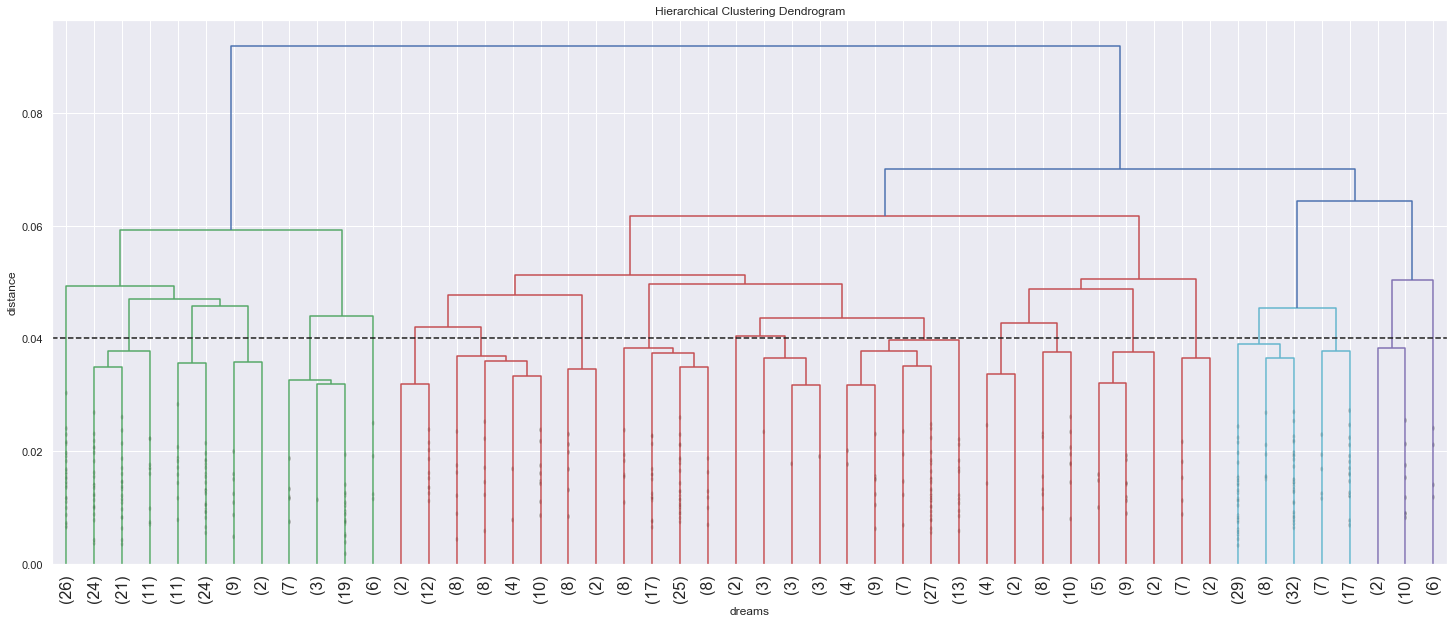

In [63]:
Phil_lista_dreams=['Phil 1: teens', 'Phil 2: late 20s', 'Phil 3: retirement']
Phil_wes_dreams = hacer_vectores_dreams(Phil_lista_dreams)
Phil_dreams_clusters_jerarq=ClusterJerarq(Phil_wes_dreams,0.04, Phil_lista_dreams) #0.04

        avg
3  0.257601
4  0.212100
1  0.164255
0  0.114979
2  0.091741
(506, 506)


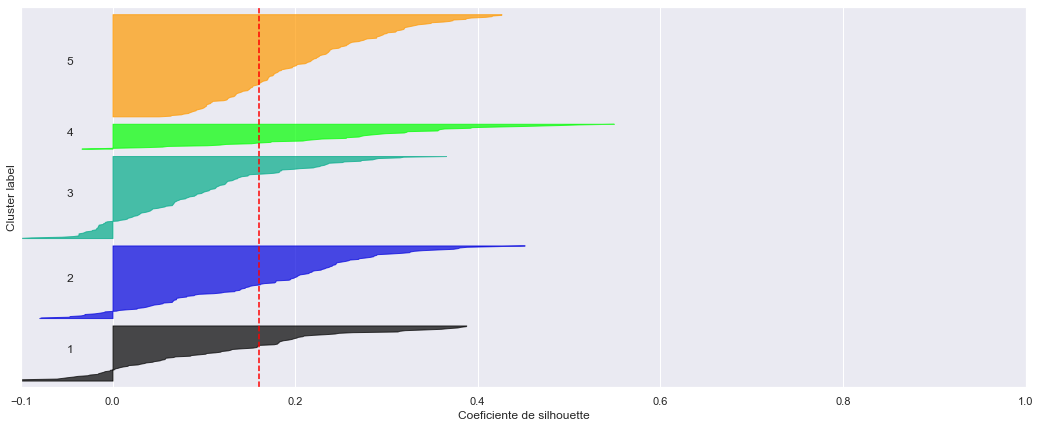

array([0.21210021, 0.25760135, 0.16425531, 0.09174148, 0.11497851])

In [64]:
# sobre clusters de kmeans
Phil_coef_sil=hacer_silhouette(Phil_wes_dreams, Phil_dreams_clusters_kmeans)
#print('len',len(Vet_coef_sil))
Phil_coef_sil["avg"].unique()

In [65]:
#with open('phil_clusters_jerarq.txt', 'w') as filehandle:
#    for listitem in Phil_dreams_clusters_jerarq:
#        filehandle.write('%d\n' % listitem)


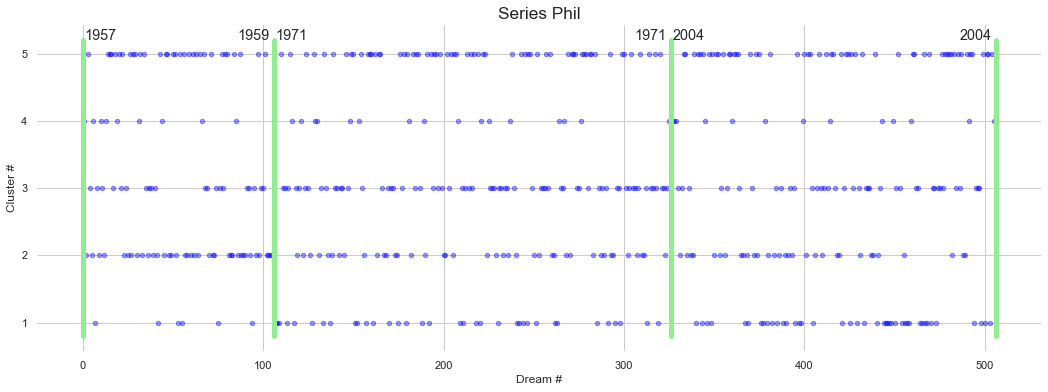

In [67]:
grafico_clusters_dreams(Phil_dreams_clusters_kmeans,Phil_lista_dreams,[])
#grafico_clusters_dreams(Phil_dreams_clusters_jerarq,Phil_lista_dreams,Phil_dominant_sent_colors)
#grafico_clusters_dreams(Phil_dreams_clusters_jerarq,Phil_lista_dreams,Phil_dominant_emot_colors)
#grafico_clusters_dreams(Phil_dreams_clusters_jerarq,Phil_lista_dreams,Phil_topics)

#grafico_histograma_clusters(Phil_dreams_clusters_jerarq,Phil_lista_dreams)

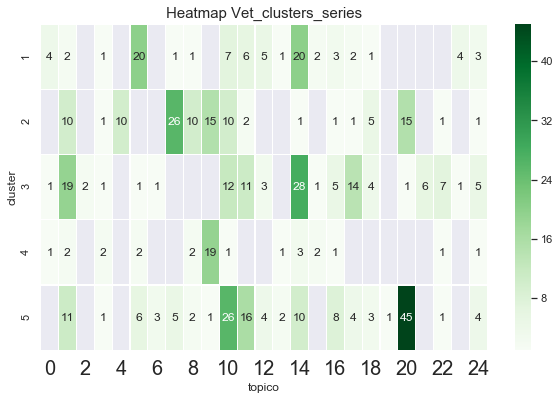

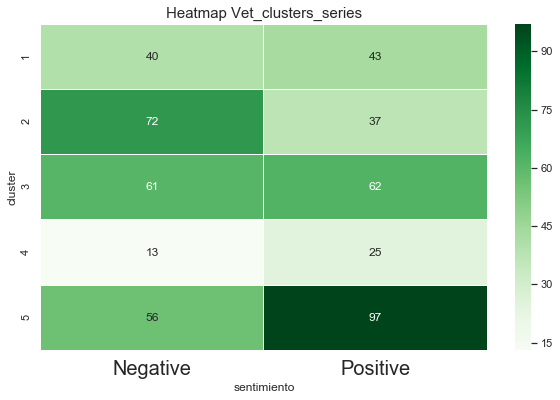

In [68]:
#grafico_heatmap(df_phil, Phil_dreams_clusters_kmeans,"group","cluster")
grafico_heatmap(pd.DataFrame(Phil_dreams_clusters_kmeans, columns=["cluster"]), Phil_topics,"cluster","topico")
plt.savefig("heatmap_Phil_topico.pdf")
grafico_heatmap(pd.DataFrame(Phil_dreams_clusters_kmeans, columns=["cluster"]), np.array(Phil_dominant_sent["Sentimiento"]),"cluster","sentimiento")
plt.savefig("heatmap_Phil_sentim.pdf")